In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\Projects Datasets/Invistico_Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [3]:
df.shape

(129880, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
df.nunique().sort_values(ascending = False)

Flight Distance                      5398
Arrival Delay in Minutes              472
Departure Delay in Minutes            466
Age                                    75
Inflight entertainment                  6
Online boarding                         6
Cleanliness                             6
Checkin service                         6
Leg room service                        6
On-board service                        6
Ease of Online booking                  6
Online support                          6
Inflight wifi service                   6
Gate location                           6
Food and drink                          6
Departure/Arrival time convenient       6
Seat comfort                            6
Baggage handling                        5
Class                                   3
Gender                                  2
Type of Travel                          2
Customer Type                           2
satisfaction                            2
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending = False)

Arrival Delay in Minutes             393
Inflight entertainment                 0
Departure Delay in Minutes             0
Online boarding                        0
Cleanliness                            0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Ease of Online booking                 0
Online support                         0
satisfaction                           0
Gender                                 0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Inflight wifi service                  0
dtype: int64

In [8]:
target = pd.DataFrame(df['satisfaction'])
feature = df.drop('satisfaction', axis = 1)
feature['Total_delay'] = feature['Departure Delay in Minutes'] + feature['Arrival Delay in Minutes']
feature.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis = 1, inplace = True)

In [9]:
discrete_num = [col for col in feature.columns if feature[col].dtype !='O' and feature[col].nunique() <= 10]
print(discrete_num)
print('No. of discrete variable: ', len((discrete_num)))

['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
No. of discrete variable:  14


In [10]:
conti_num = [col for col in feature.columns if feature[col].dtype !='O' and feature[col].nunique() > 10]
print(conti_num)
print('No. of continuous variable: ', len(conti_num))

['Age', 'Flight Distance', 'Total_delay']
No. of continuous variable:  3


In [11]:
cat_var = [col for col in feature.columns if feature[col].dtype =='O']
print(cat_var)
print('No. of categorical variable: ', len(cat_var))

['Gender', 'Customer Type', 'Type of Travel', 'Class']
No. of categorical variable:  4


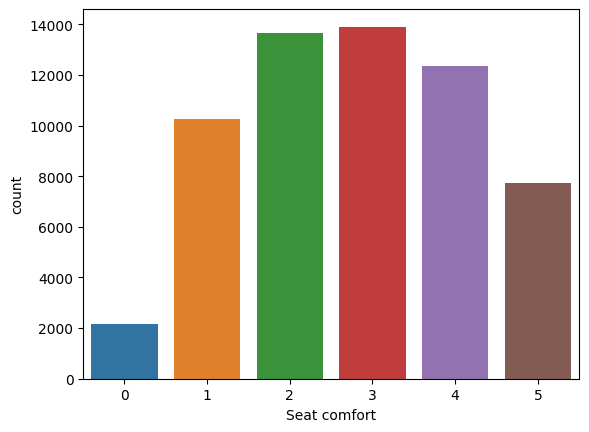

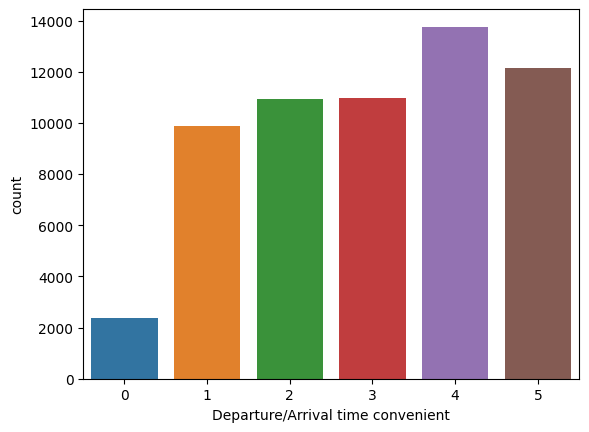

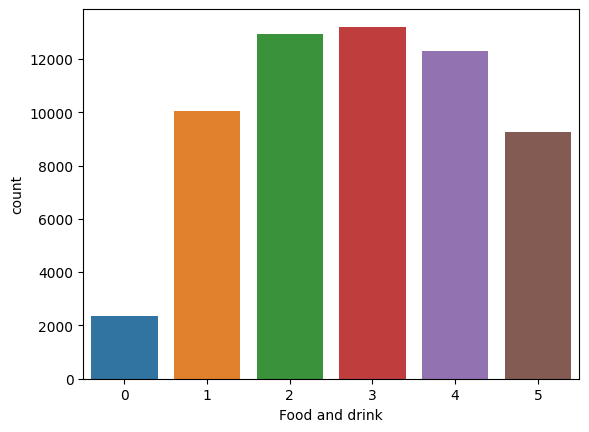

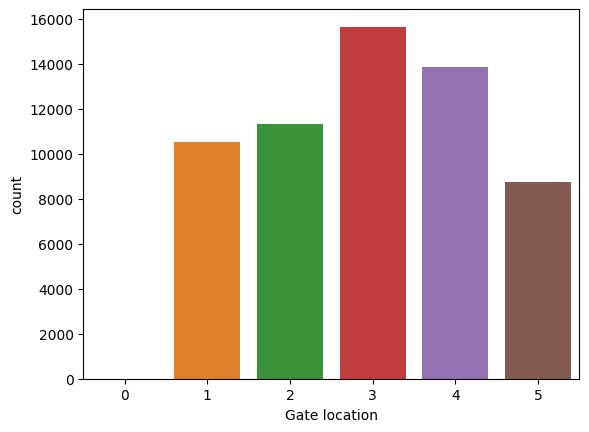

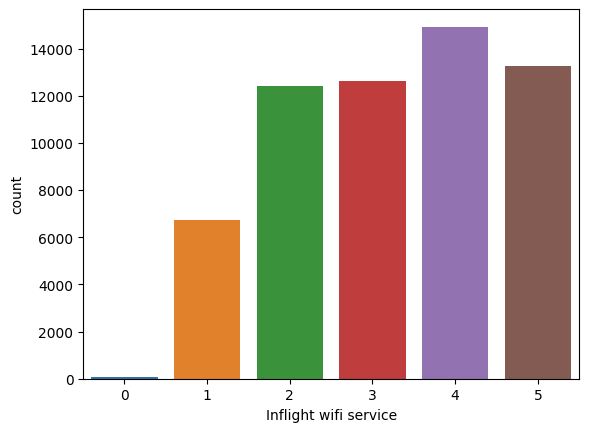

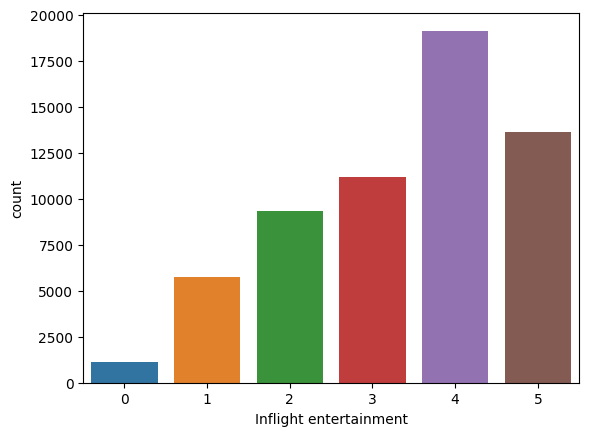

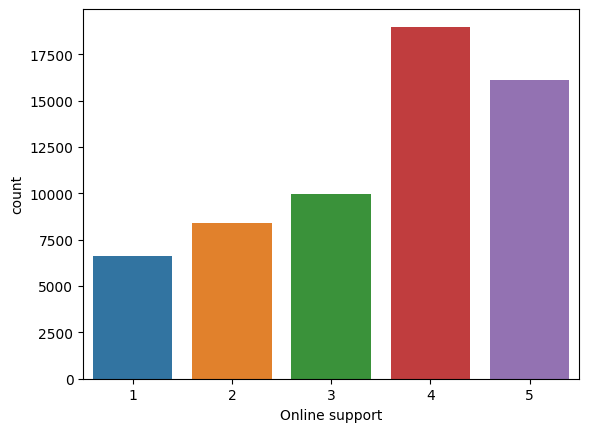

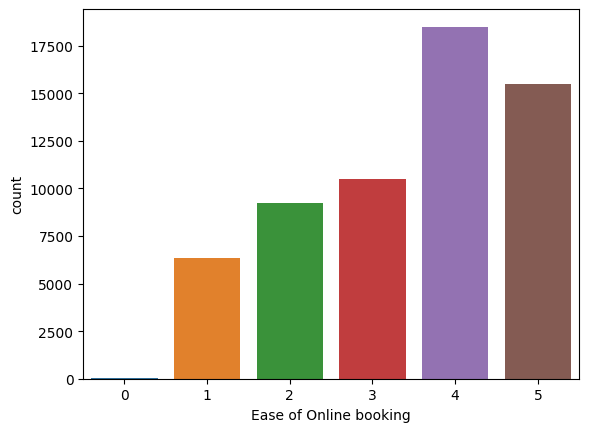

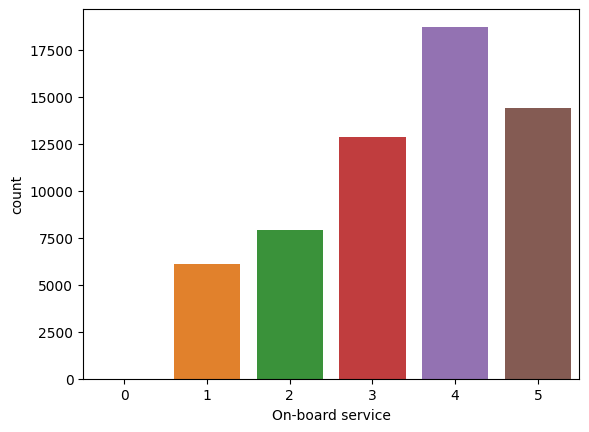

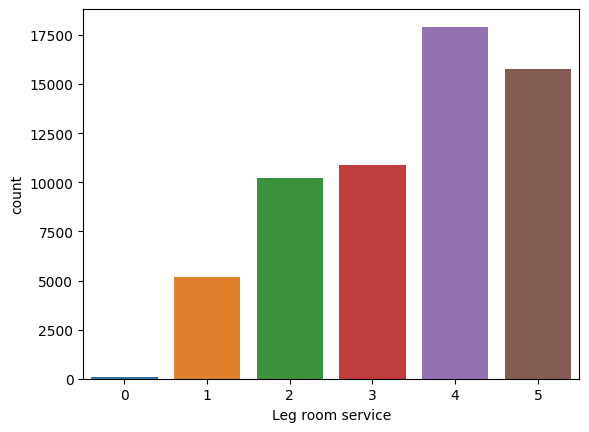

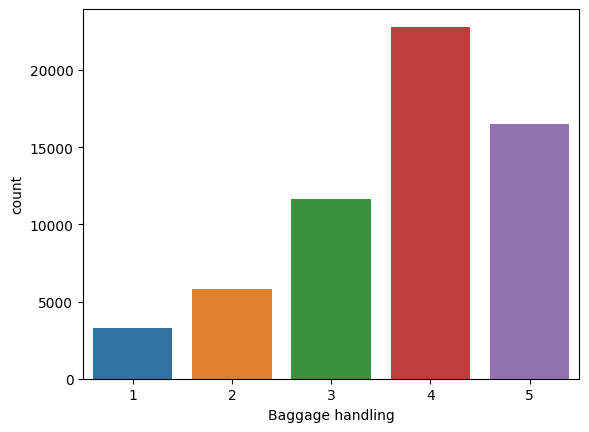

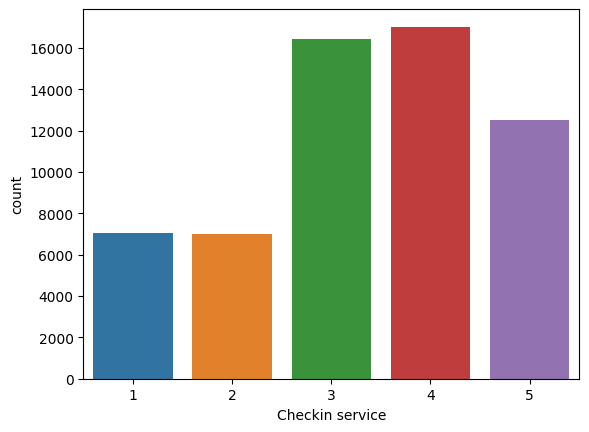

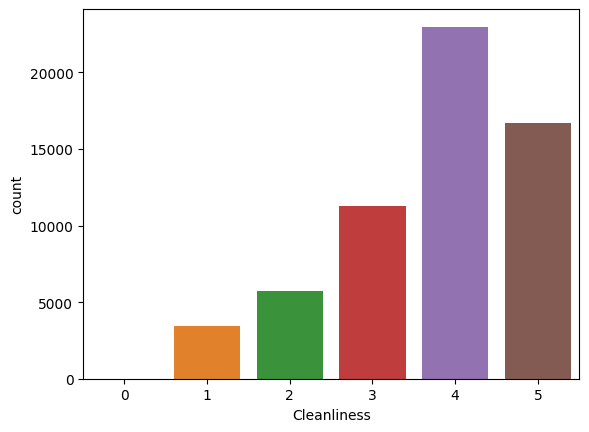

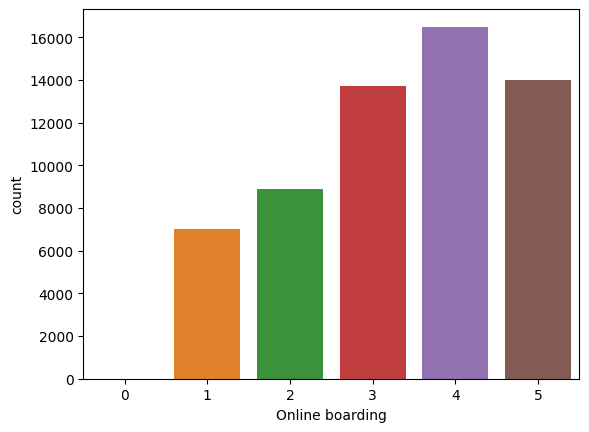

In [12]:
for i in discrete_num:
    sns.countplot(x=feature.loc[feature['Flight Distance'] >= 2000][i])
    plt.show()

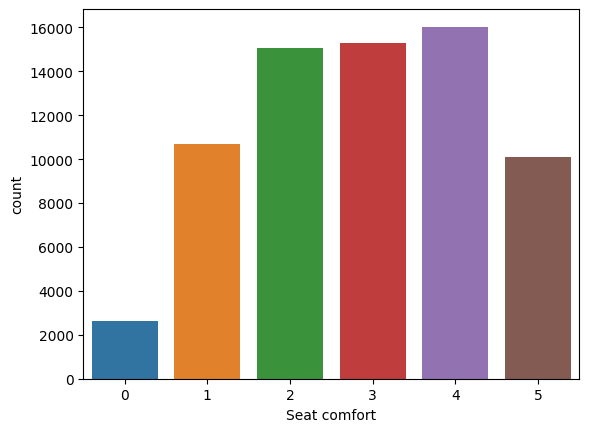

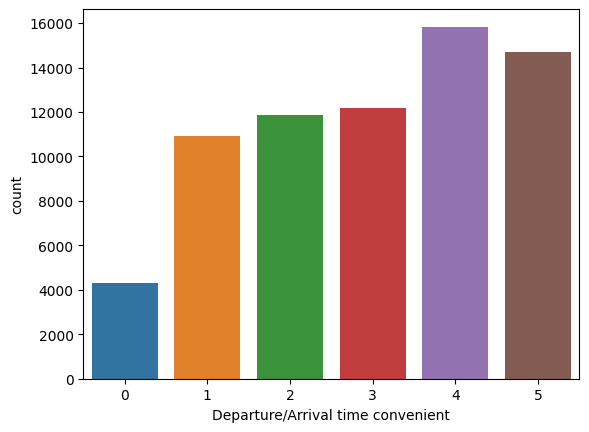

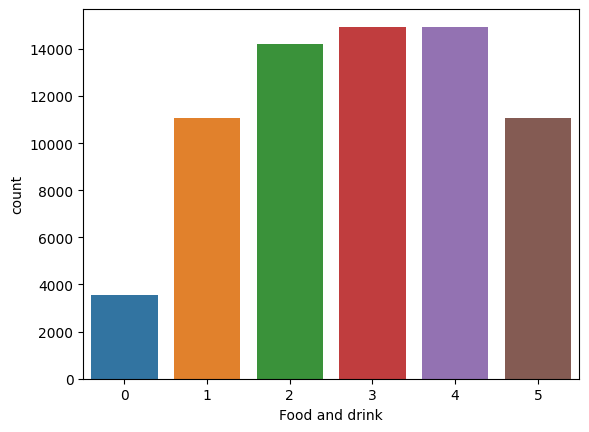

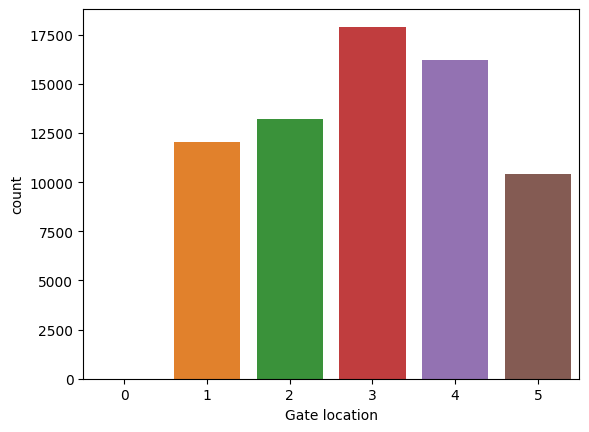

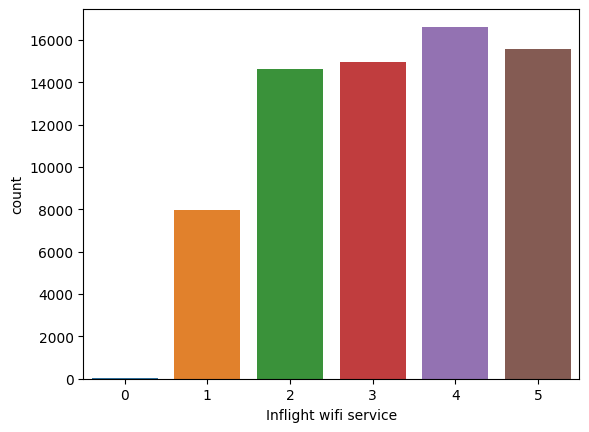

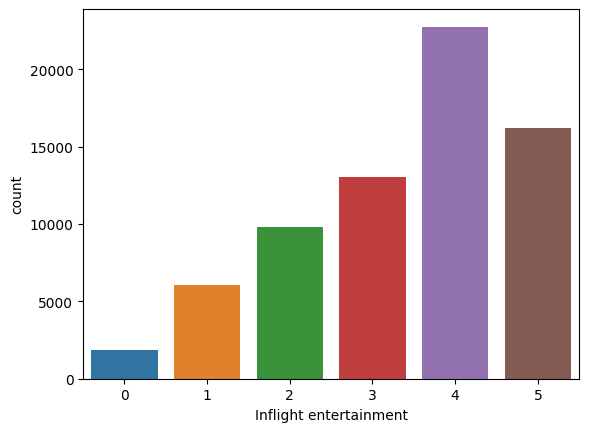

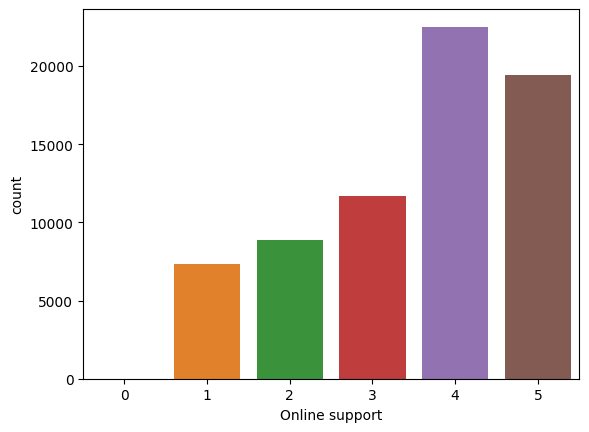

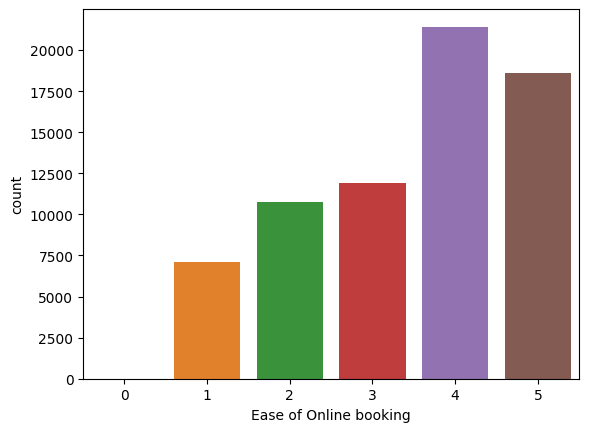

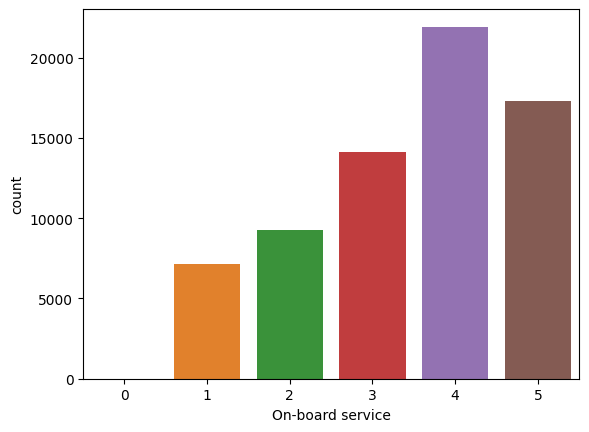

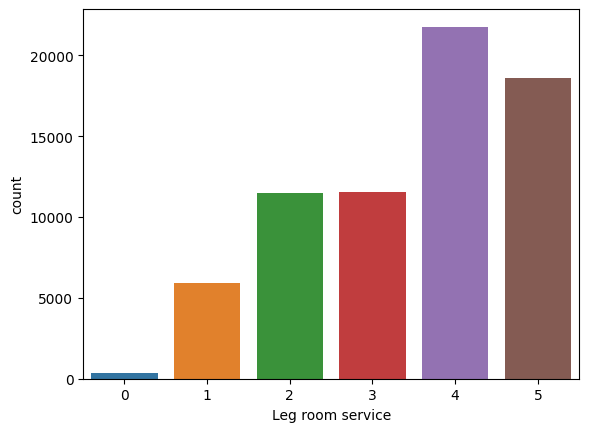

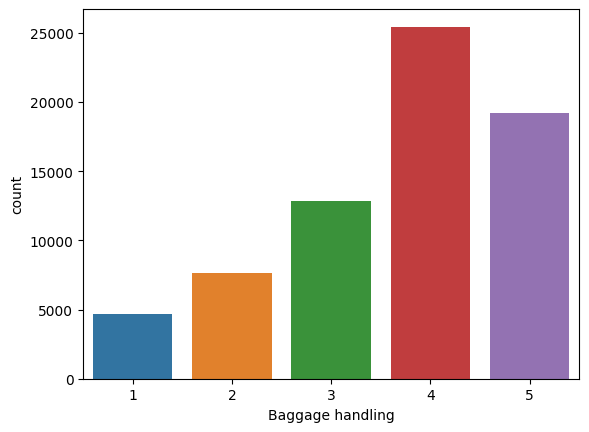

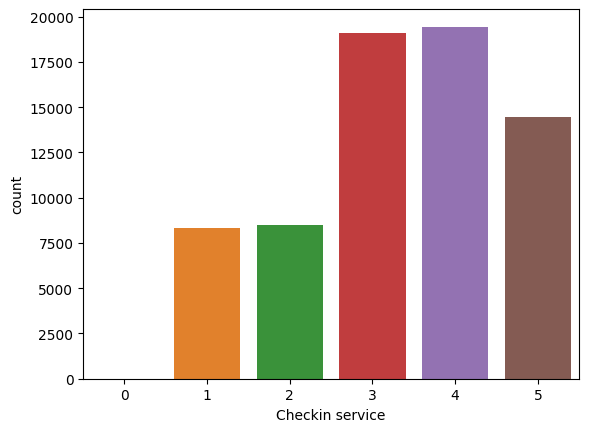

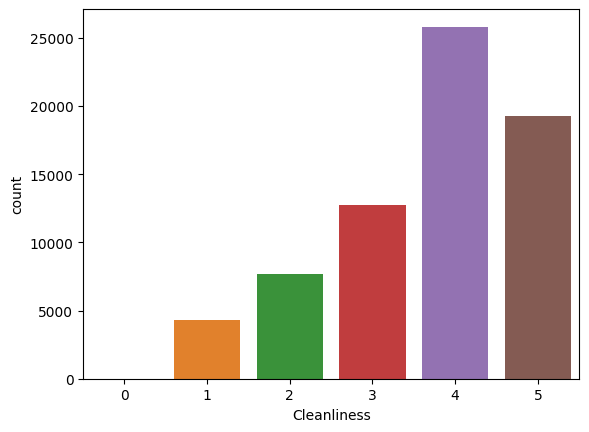

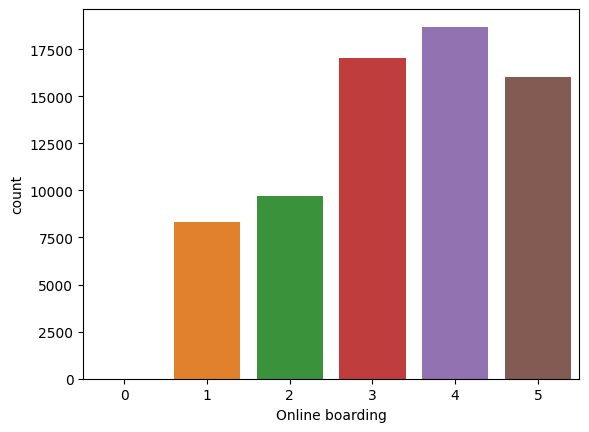

In [13]:
for i in discrete_num:
    sns.countplot(x=feature.loc[feature['Flight Distance'] < 2000][i])
    plt.show()

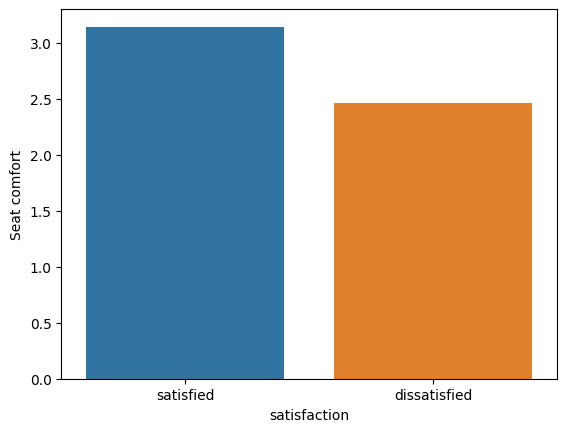

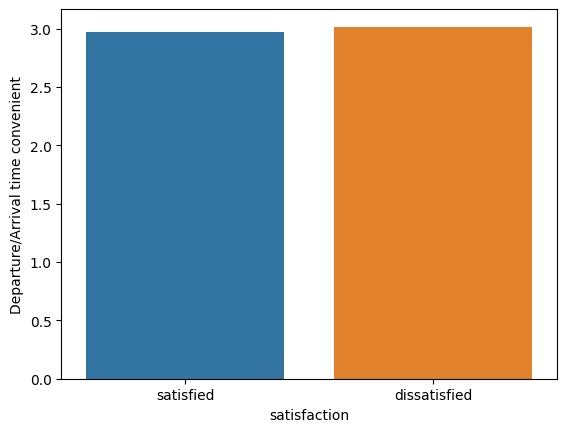

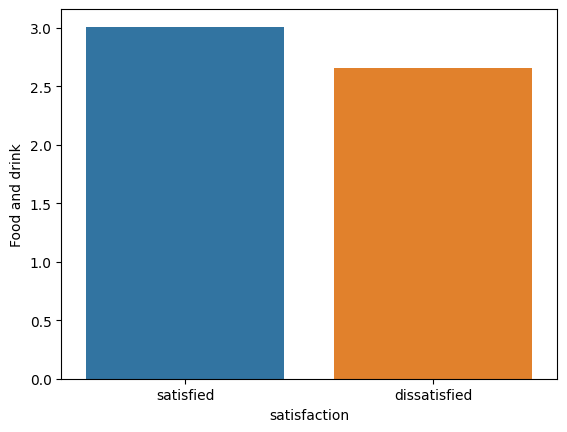

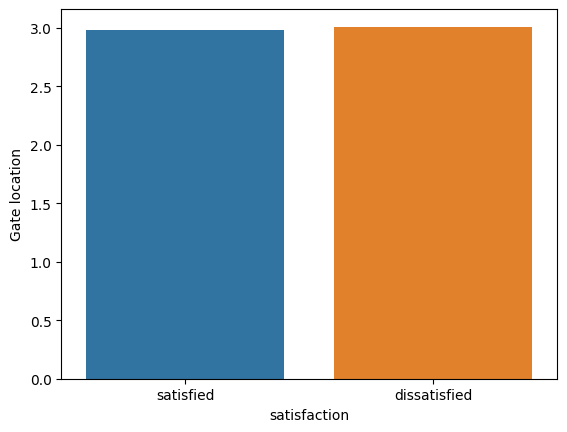

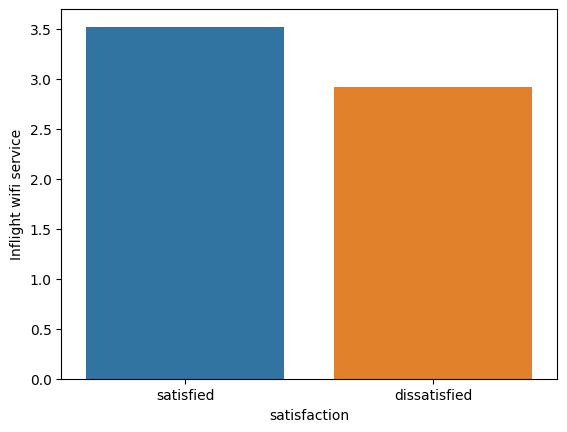

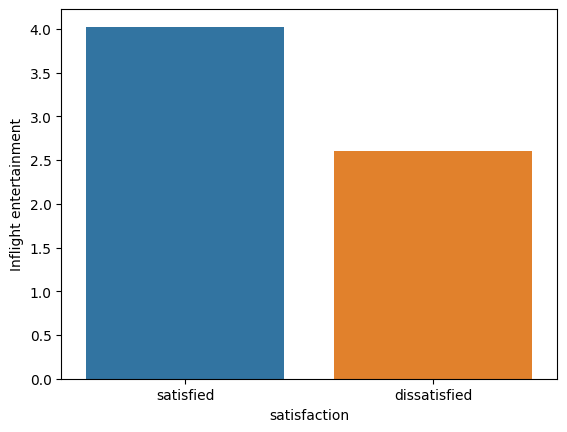

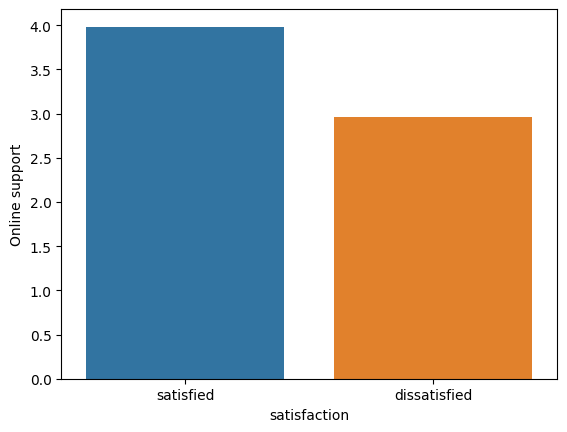

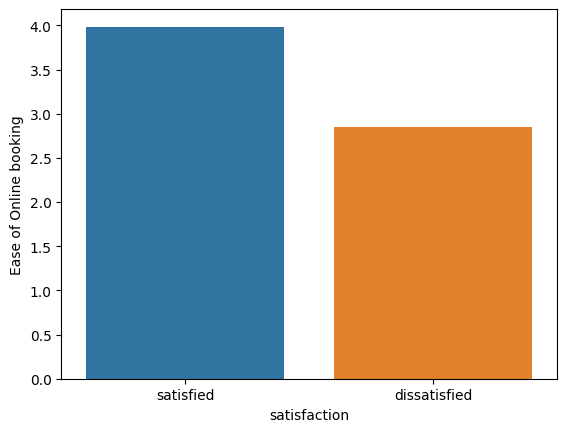

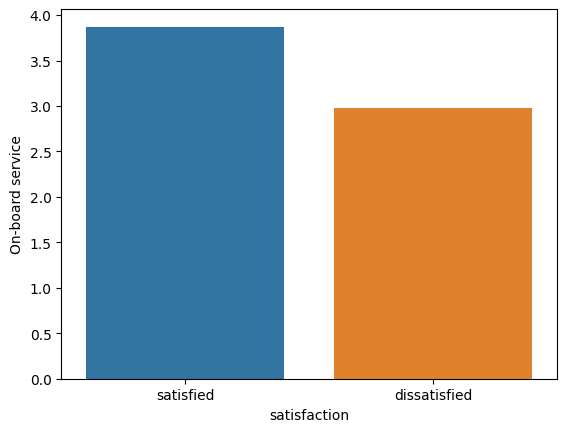

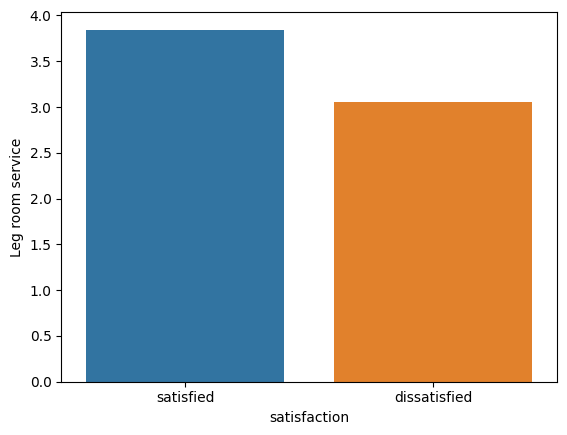

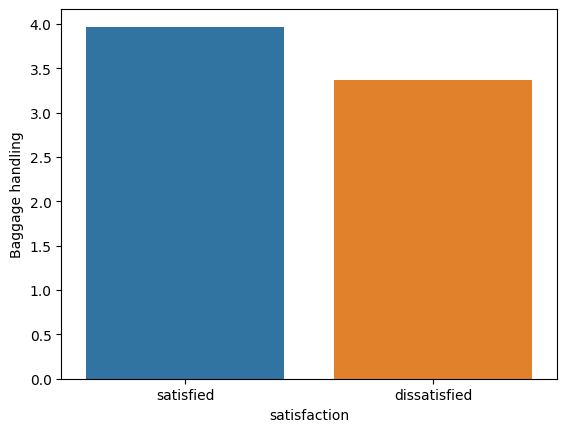

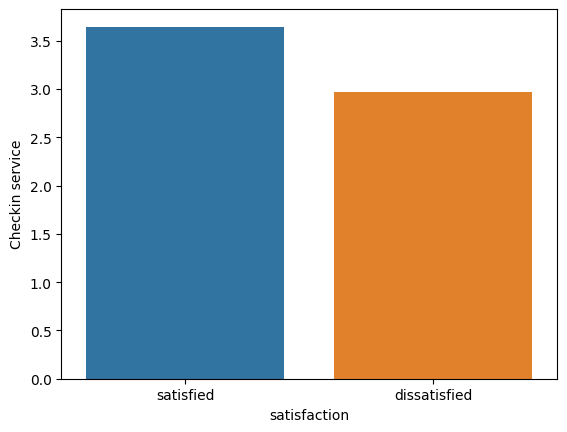

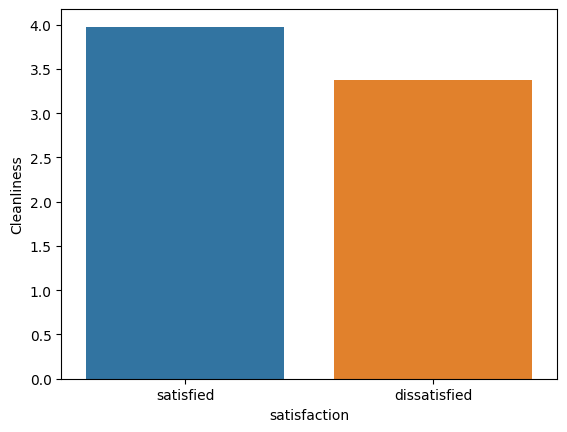

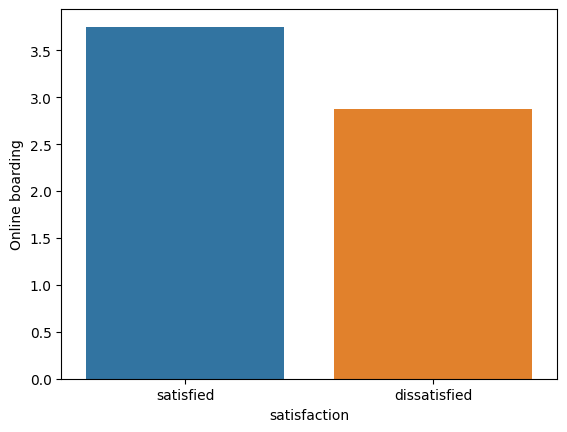

In [14]:
for i in discrete_num:
    sns.barplot(y = feature[i], x = target['satisfaction'], ci = None)
    plt.show()

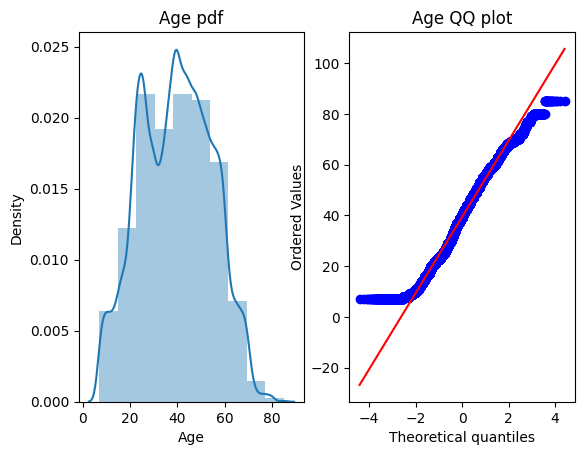

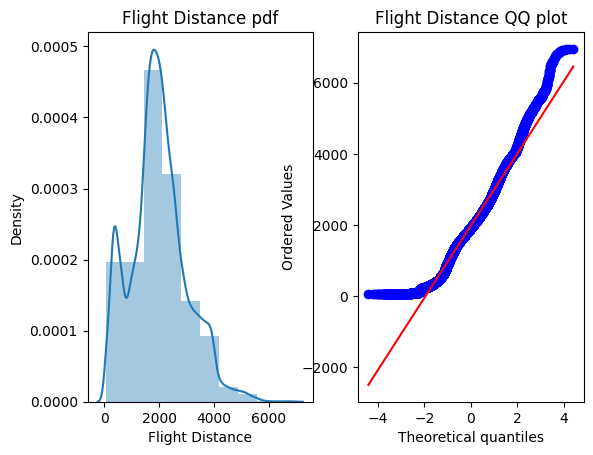

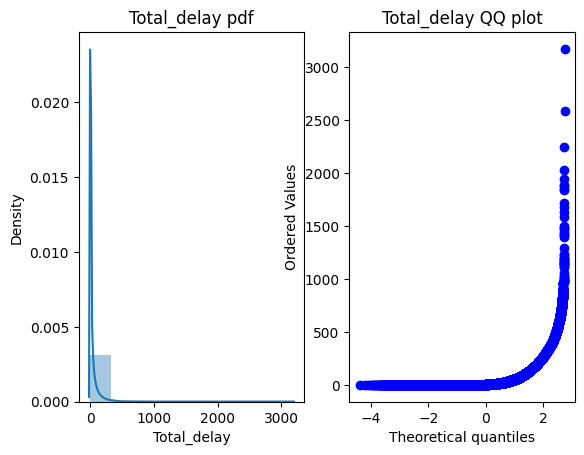

In [15]:
for i in conti_num:
    plt.subplot(121)
    sns.distplot(x = feature[i], kde = True, bins = 10)
    plt.xlabel(i)
    plt.title(i + ' pdf')
    
    plt.subplot(122)
    stats.probplot(feature[i], dist = 'norm', plot = plt)
    plt.title(i + ' QQ plot')
    plt.show()

In [16]:
trf = FunctionTransformer(func = np.log1p)
feature['Total_delay'] = trf.fit_transform(feature['Total_delay'])

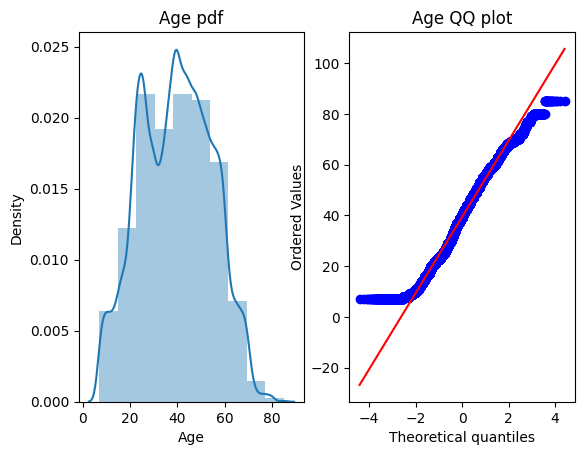

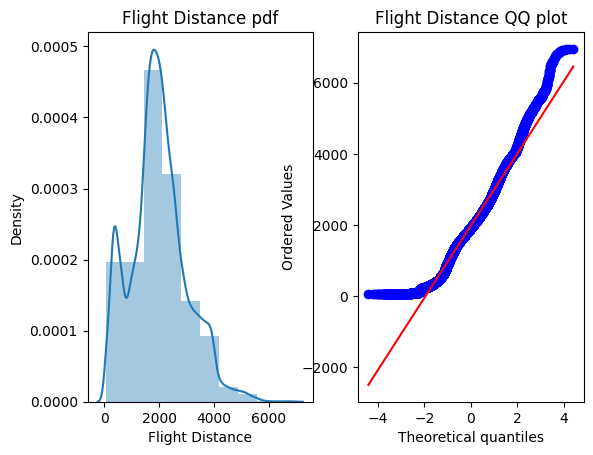

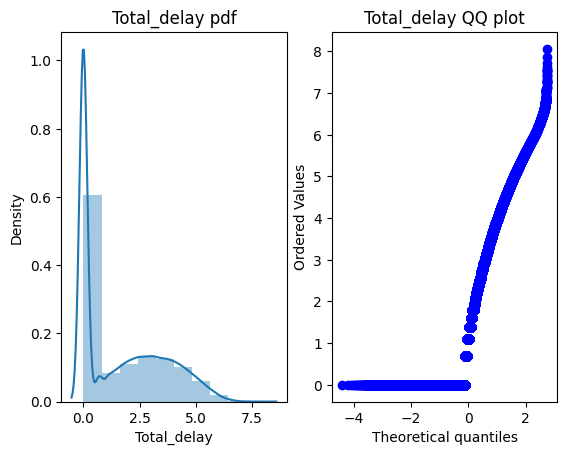

In [17]:
for i in conti_num:
    plt.subplot(121)
    sns.distplot(x = feature[i], kde = True, bins = 10)
    plt.xlabel(i)
    plt.title(i + ' pdf')
    
    plt.subplot(122)
    stats.probplot(feature[i], dist = 'norm', plot = plt)
    plt.title(i + ' QQ plot')
    plt.show()

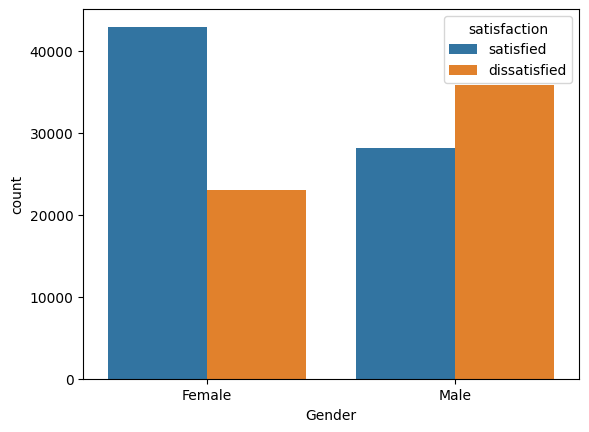

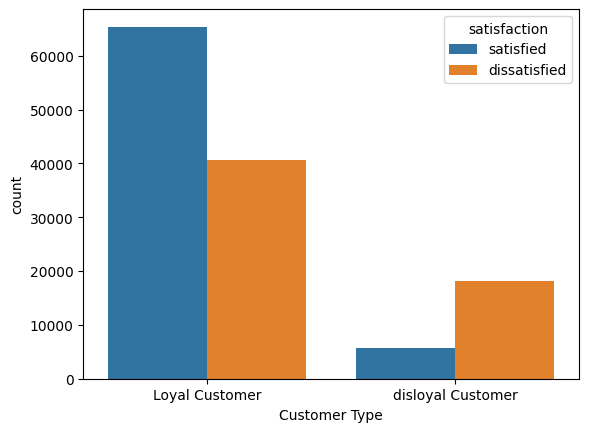

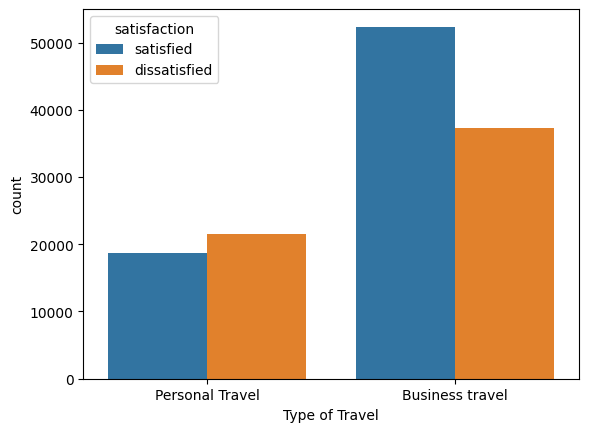

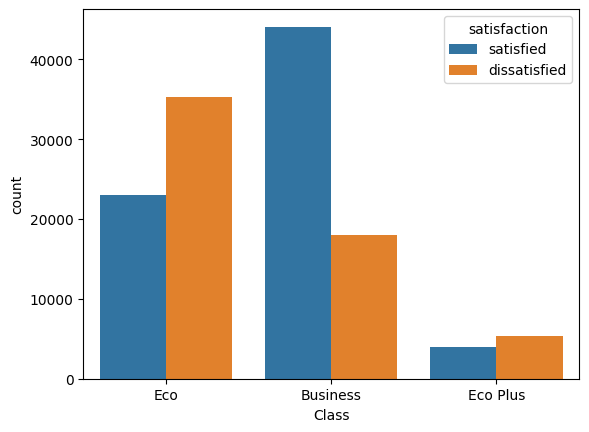

In [18]:
for i in cat_var:
    sns.countplot(x=feature[i], hue = target["satisfaction"])
    plt.show()

In [19]:
feature.groupby(["Customer Type"]).Age.mean()

Customer Type
Loyal Customer       41.462008
disloyal Customer    30.352565
Name: Age, dtype: float64

In [20]:
feature.groupby(["Customer Type"]).Total_delay.mean()

Customer Type
Loyal Customer       1.674053
disloyal Customer    1.699940
Name: Total_delay, dtype: float64

In [21]:
feature.groupby(["Customer Type"]).agg({'Flight Distance':'mean'})

,Flight Distance
Customer Type,
Loyal Customer,1972.200349
disloyal Customer,2022.495837


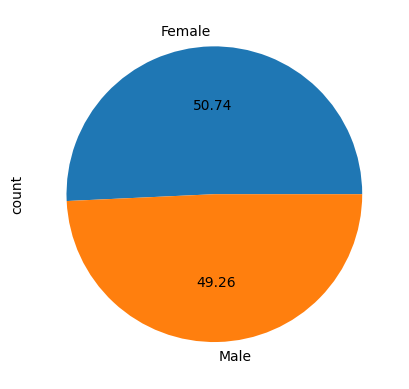

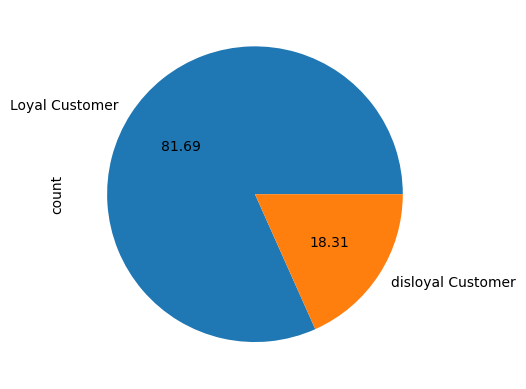

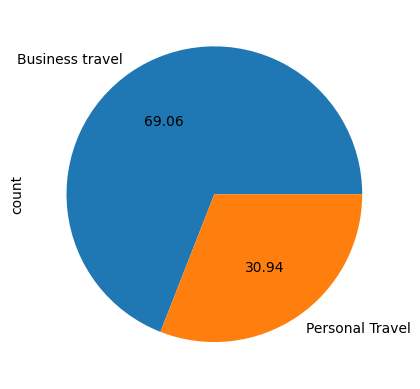

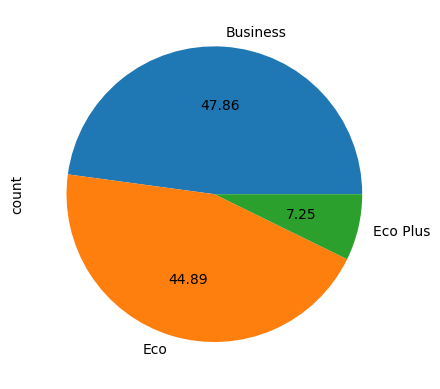

In [22]:
for i in cat_var:
    feature[i].value_counts().plot(kind='pie', autopct = '%.2f')
    plt.show()

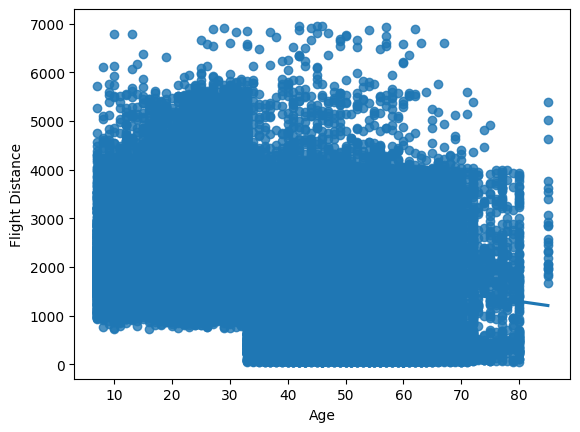

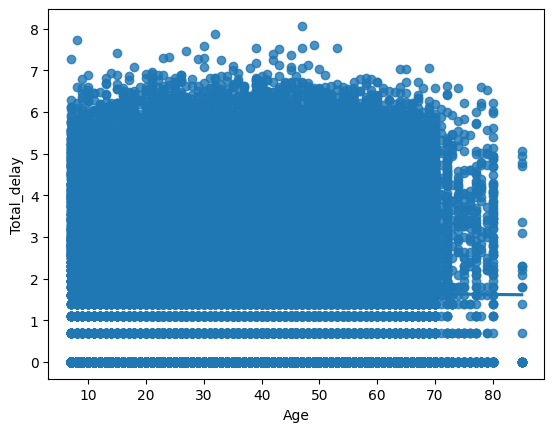

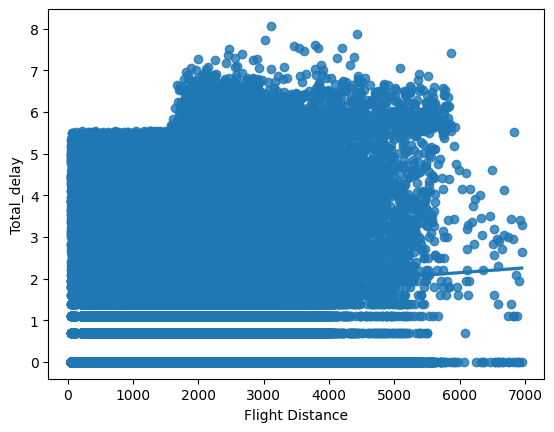

In [23]:
for i in range(len(conti_num)):
    for j in range(i+1, len(conti_num)):
        sns.regplot(x = feature[conti_num[i]], y = feature[conti_num[j]], scatter=True)
        plt.show()

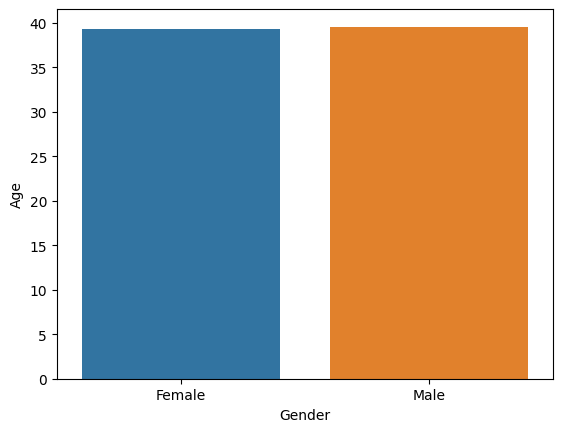

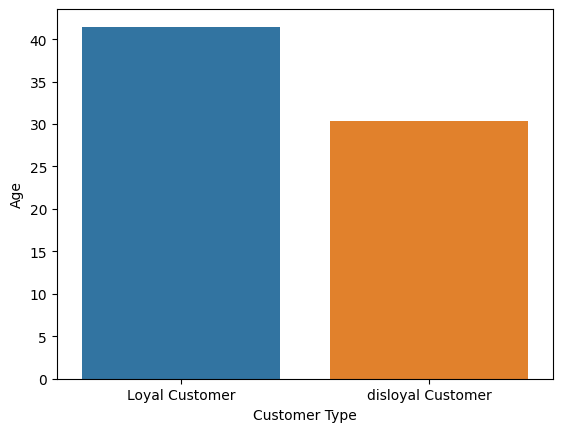

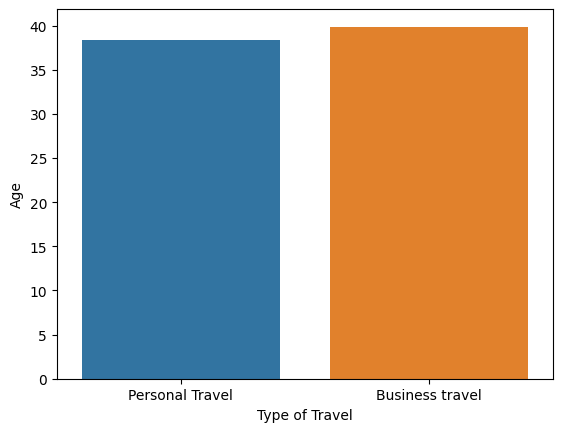

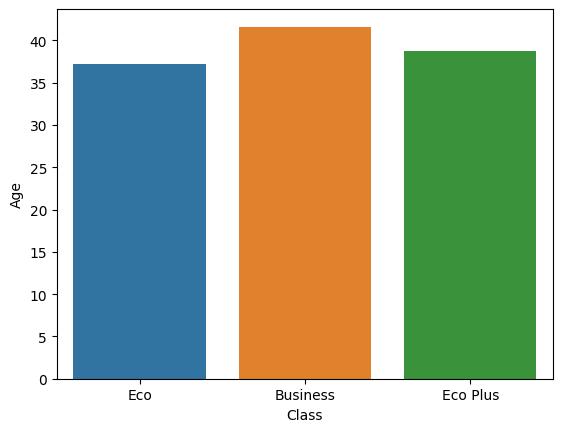

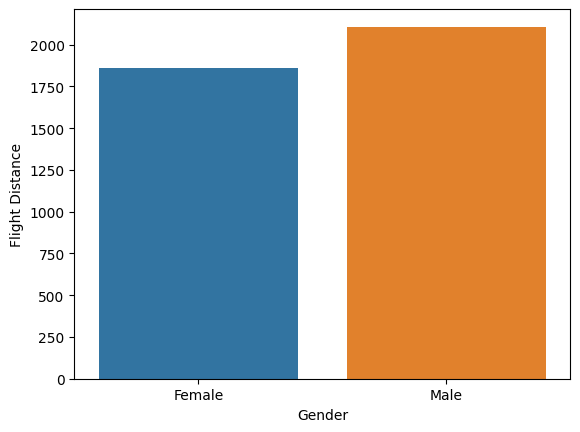

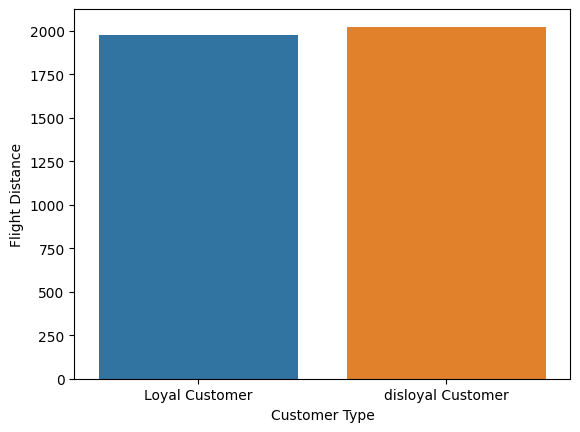

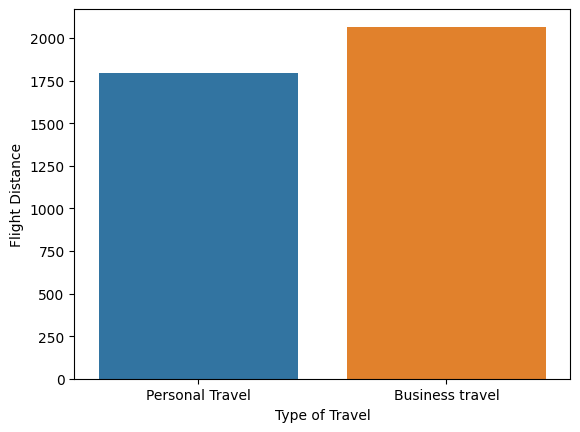

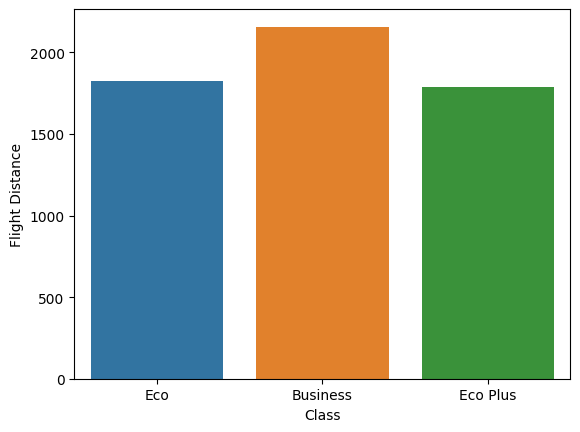

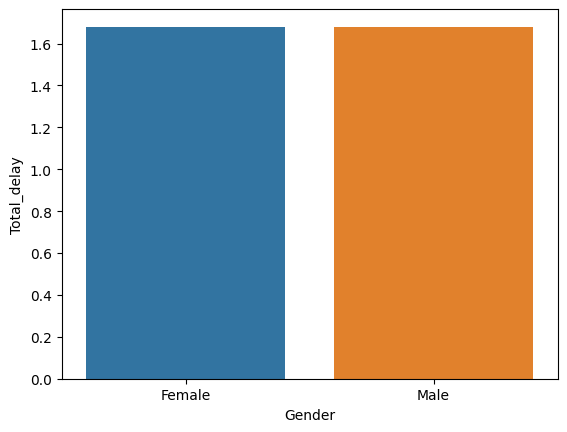

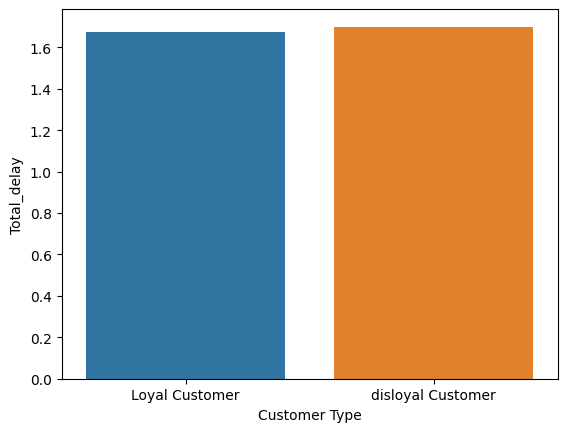

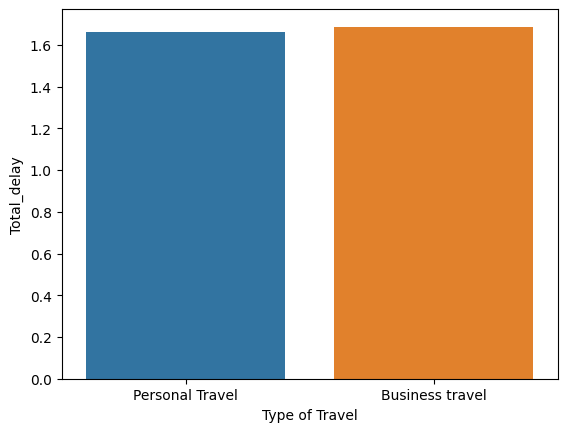

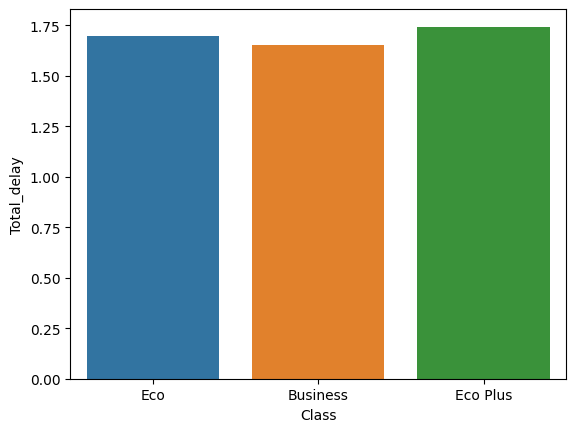

In [24]:
for i in range(len(conti_num)):
    for j in range(len(cat_var)):
        sns.barplot(y = feature[conti_num[i]], x = feature[cat_var[j]], ci = None)
        plt.show()

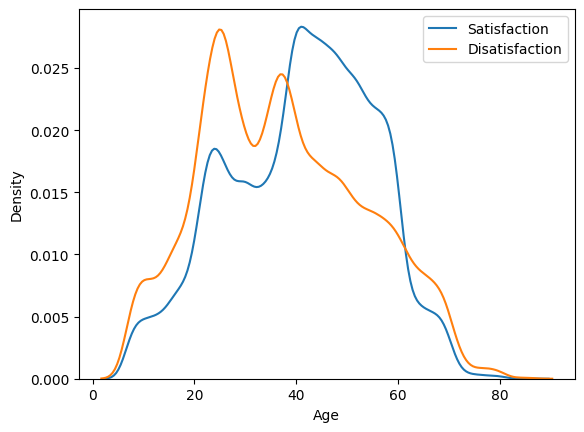

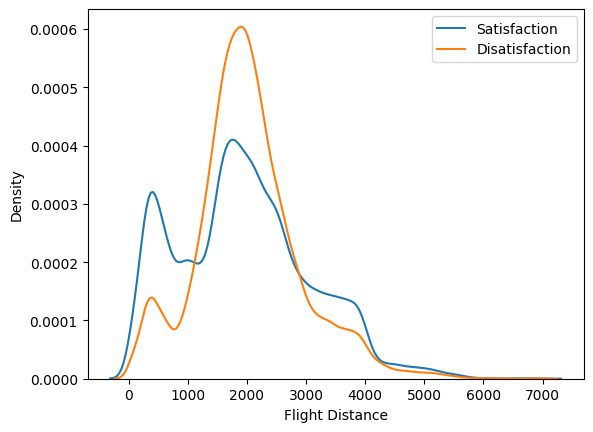

In [25]:
for i in ['Age', 'Flight Distance']:
    sns.distplot(df[df['satisfaction']=='satisfied'][i], hist = False, label = "Satisfaction")
    sns.distplot(df[df['satisfaction']=='dissatisfied'][i], hist = False, label = "Disatisfaction")
    plt.legend()
    plt.show()

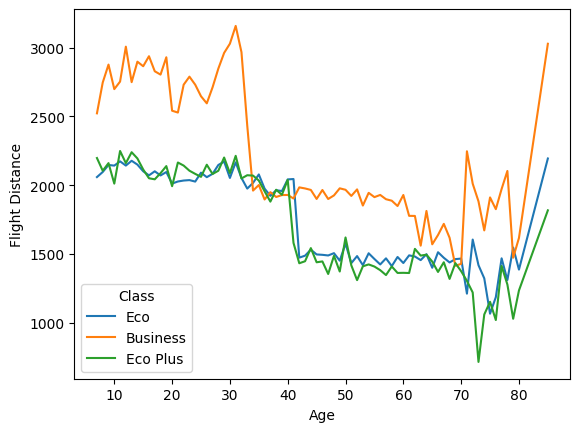

In [26]:
sns.lineplot(x = feature['Age'],y = feature['Flight Distance'],hue = feature['Class'], ci = None)
plt.show()

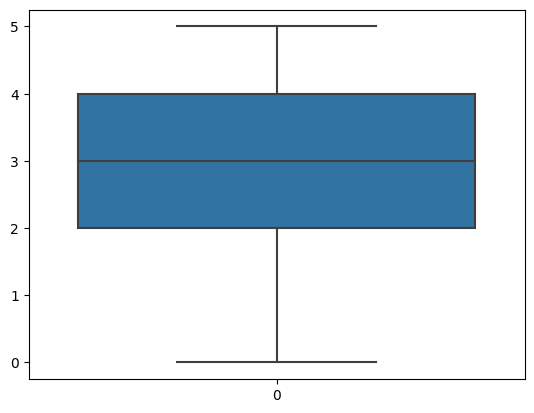

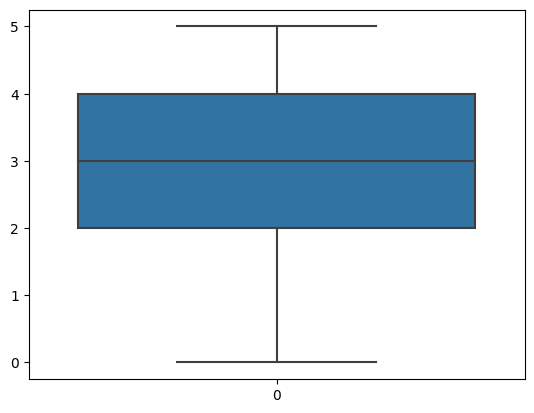

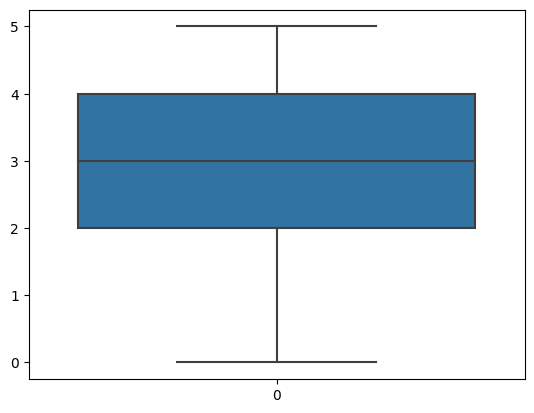

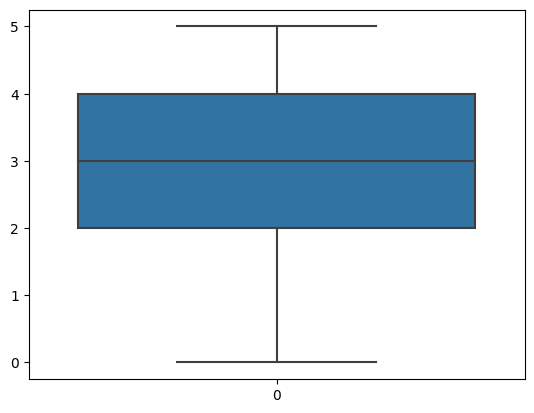

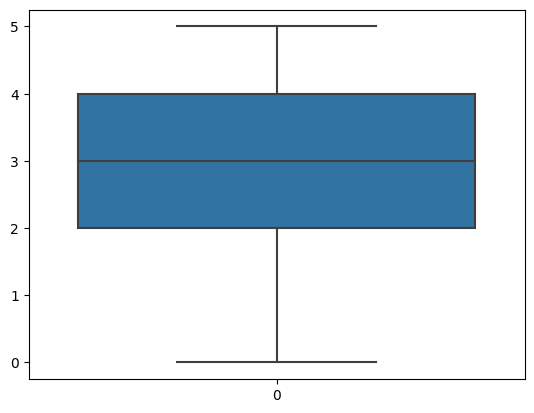

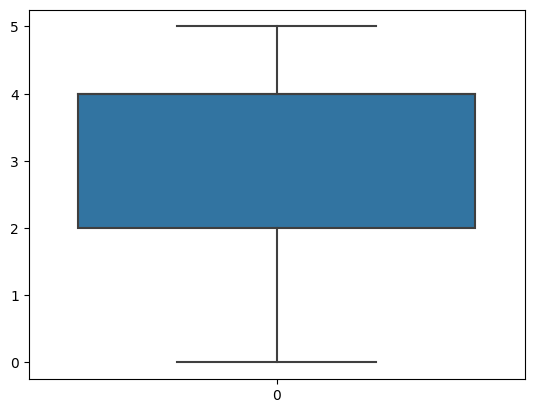

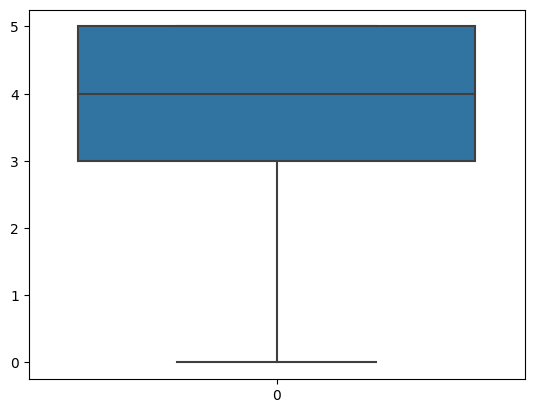

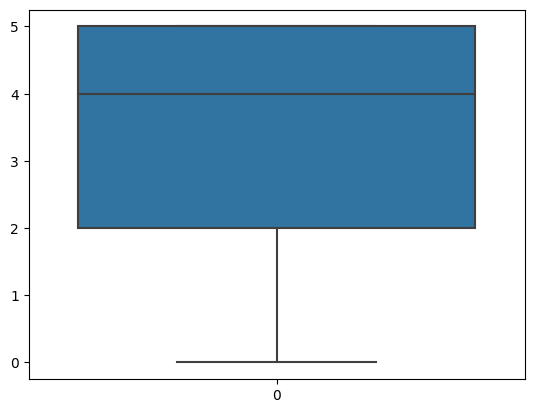

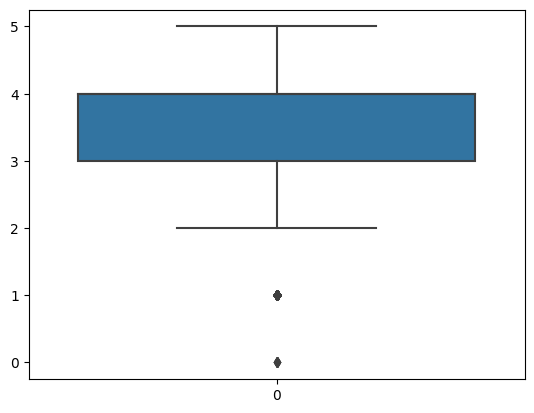

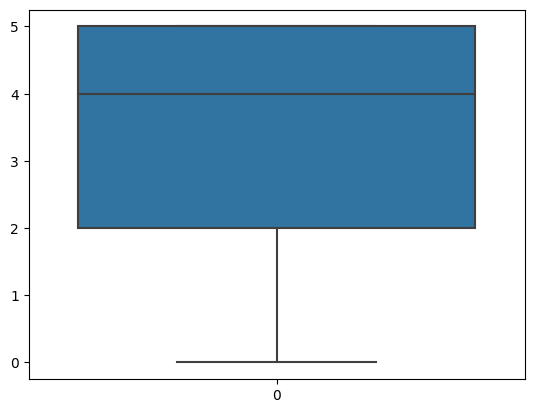

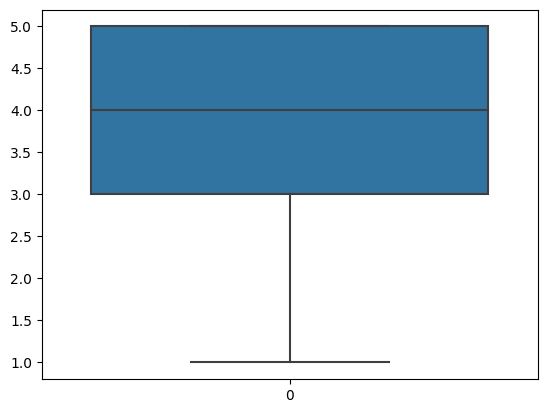

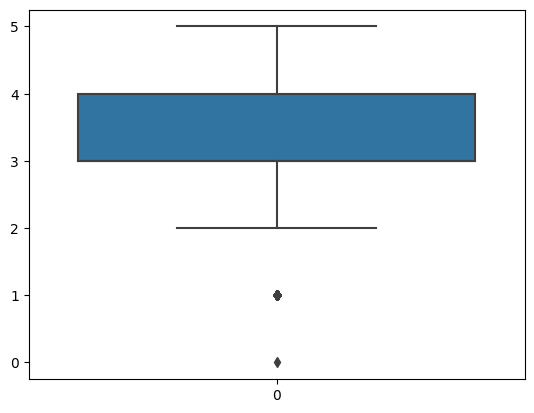

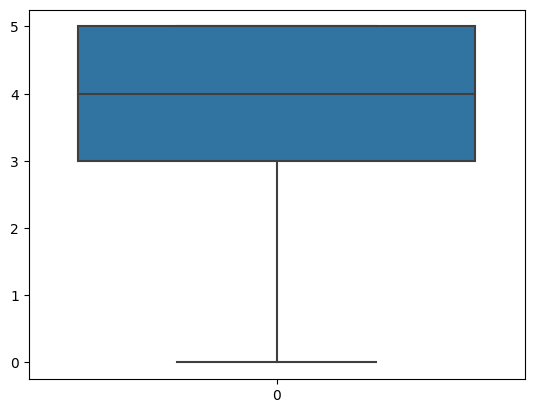

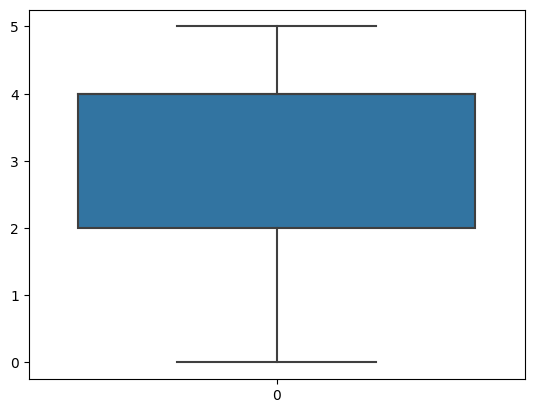

In [27]:
for i in discrete_num:
    sns.boxplot(feature[i])
    plt.show()

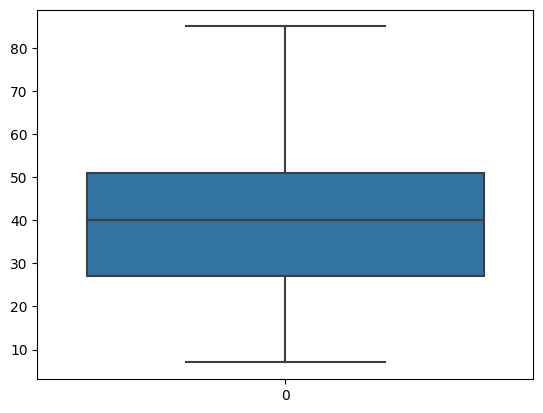

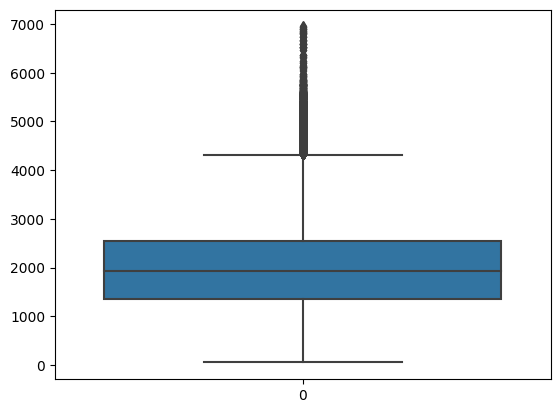

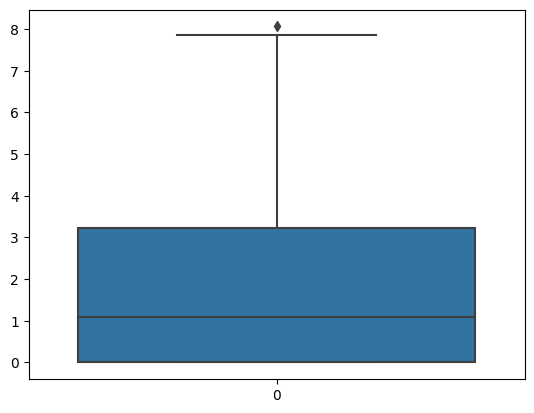

In [28]:
for i in conti_num:
    sns.boxplot(feature[i])
    plt.show()